<h1>ISHU GOYAL</h1>
<h2> Hypothesis - “Cryptocurrency is the new way forward” </h2>
<h3> Datasets:</h3>
<ol>
<li>Cryptocurrency Dataset(crypto.xlsx)</li>
<li>Gold Dataset(gold_cleaned.xlsx)</li>
<li>Gold Market Cap (Gold Market Capitalization.xlsx)</li>
</ol>


<h3> My Hypothesis is Proved

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import warnings
warnings.filterwarnings("ignore")

# 2) Importing Datasets

In [2]:
#Importing Crypto Data
crypto_data = pd.ExcelFile('crypto.xlsx')
btc_df = pd.read_excel(crypto_data, 'BTC')
ltc_df = pd.read_excel(crypto_data, 'LTC')
xrp_df = pd.read_excel(crypto_data, 'XRP')
eth_df = pd.read_excel(crypto_data, 'ETH')
matic_df = pd.read_excel(crypto_data, 'MATIC')

#Importing Gold Data
gold_data = pd.read_excel('gold_cleaned.xlsx')
gold_m=pd.read_excel('Gold Market Capitalization.xlsx')
pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [3]:
# Adding Symbol Column which would be helpful after joining dataset
btc_df['Symbol'] = 'BTC'
ltc_df['Symbol'] = 'LTC'
xrp_df['Symbol'] = 'XRP'
eth_df['Symbol'] = 'ETH'
matic_df['Symbol'] = 'MATIC'

#Creating Columns High, Low, Close using USD data
gold_data['Name'] = pd.to_datetime(gold_data['Name'])
gold_data.rename(columns={'Name':'Date'}, inplace=True)
gold_data= gold_data[['Date','US dollar']];
gold_data.rename(columns={'US dollar':'Open'}, inplace=True)
gold_data['High'] = gold_data['Open'];
gold_data['Low'] = gold_data['Open'];
gold_data['Close'] = gold_data['Open'];
gold_data['Symbol']='GOLD'

In [4]:
xrp_df.head(5)

,Date,Open,High,Low,Close,Volume,Market Cap,Symbol
0,2021-09-30,0.92751,0.96408,0.92292,0.95264,3051316850.03000,44536153773.63000,XRP
1,2021-09-29,0.89459,0.99035,0.88795,0.92835,3558174319.64000,43400740797.17000,XRP
2,2021-09-28,0.92306,0.94259,0.89250,0.89369,2818990506.00000,41780353565.36000,XRP
3,2021-09-27,0.94596,0.98149,0.92108,0.92369,3014579575.06000,43152397719.64000,XRP
4,2021-09-26,0.94157,0.95669,0.89483,0.94472,3142032668.82000,44135149070.76000,XRP


In [5]:
eth_df.head(5)

,Date,Open,High,Low,Close,Volume,Market Cap,Symbol
0,2021-09-30,2852.55884,3046.51942,2840.28948,3001.67905,17661065099,353421000000.00000,ETH
1,2021-09-29,2809.29758,2946.88128,2786.98824,2853.14337,15763456158,335894000000.00000,ETH
2,2021-09-28,2928.96329,2970.77049,2793.36051,2807.29674,16895079070,330459000000.00000,ETH
3,2021-09-27,3065.83799,3163.66501,2932.69283,2934.13880,19164053681,345351000000.00000,ETH
4,2021-09-26,2926.34313,3114.85740,2744.58291,3062.26536,21172766310,360390000000.00000,ETH


In [6]:
matic_df.head(5)

,Date,Open,High,Low,Close,Volume,Market Cap,Symbol
0,2021-09-30,1.10029,1.14913,1.09638,1.12711,625455857.70000,7520409633.00000,MATIC
1,2021-09-29,1.05122,1.11147,1.04540,1.09942,579309057.00000,7335636437.00000,MATIC
2,2021-09-28,1.08483,1.11252,1.04744,1.05036,555507934.50000,7008286327.00000,MATIC
3,2021-09-27,1.12487,1.16866,1.08372,1.08669,642955331.10000,7250745514.00000,MATIC
4,2021-09-26,1.12319,1.16613,1.03418,1.12302,793300900.90000,7493094871.00000,MATIC


In [7]:
gold_data.head(5)

,Date,Open,High,Low,Close,Volume,Chg%,Symbol,Per_Chg_Vol
0,2013-01-01,1653.50000,2357.50000,993.75000,1657.50000,0,0.00000,GOLD,0.00000
1,2013-01-02,1689.75000,2393.75000,993.75000,1693.75000,0,0.00000,GOLD,0.00000
2,2013-01-03,1675.50000,2379.50000,979.50000,1679.50000,0,0.00000,GOLD,0.00000
3,2013-01-04,1644.00000,2348.00000,948.00000,1648.00000,0,0.00000,GOLD,0.00000
4,2013-01-07,1641.25000,2345.25000,945.25000,1645.25000,0,0.00000,GOLD,0.00000


# 3)Joining Datasets


In [8]:
# Joining DATA
df=pd.concat([btc_df, ltc_df])
df=pd.concat([df, xrp_df])
df=pd.concat([df, eth_df])
df=pd.concat([df, matic_df])
df=pd.concat([df, gold_data])


In [9]:
#Adding Return% Columns 
df = df.replace(np.nan, 0)
btc_df = btc_df.replace(np.nan, 0)
ltc_df = ltc_df.replace(np.nan, 0)
xrp_df = xrp_df.replace(np.nan, 0)
eth_df = eth_df.replace(np.nan, 0)
matic_df = matic_df.replace(np.nan, 0)

gold_data = gold_data.replace(np.nan, 0)


df['Returns%'] = (df['Close'] - df['Open'])*100/df['Open']

<h1>Dataset Exploration

<h3>1) Tabular Representation


In [10]:
df.head

<bound method NDFrame.head of            Date        Open        High         Low       Close  \
0    2021-09-30 41551.27084 44092.60056 41444.58160 43790.89563   
1    2021-09-29 41064.98395 42545.25855 40829.66928 41564.36348   
2    2021-09-28 42200.89661 42775.14614 40931.66250 41034.54467   
3    2021-09-27 43234.18493 44313.24588 42190.63258 42235.73185   
4    2021-09-26 42721.62866 43919.30097 40848.46166 43208.53910   
...         ...         ...         ...         ...         ...   
2024 2020-10-05  1905.60000  2609.60000  1209.60000  1909.60000   
2025 2020-10-06  1909.40000  2613.40000  1213.40000  1913.40000   
2026 2020-10-07  1880.50000  2584.50000  1184.50000  1884.50000   
2027 2020-10-08  1883.45000  2587.45000  1187.45000  1887.45000   
2028 2020-10-09  1919.25000  2623.25000  1223.25000  1923.25000   

                Volume         Market Cap Symbol     Chg%  Per_Chg_Vol  \
0    31141681925.00000 824619217607.52002    BTC  0.00000      0.00000   
1    30602359905.

<h3>2)Scatter plot Matrix

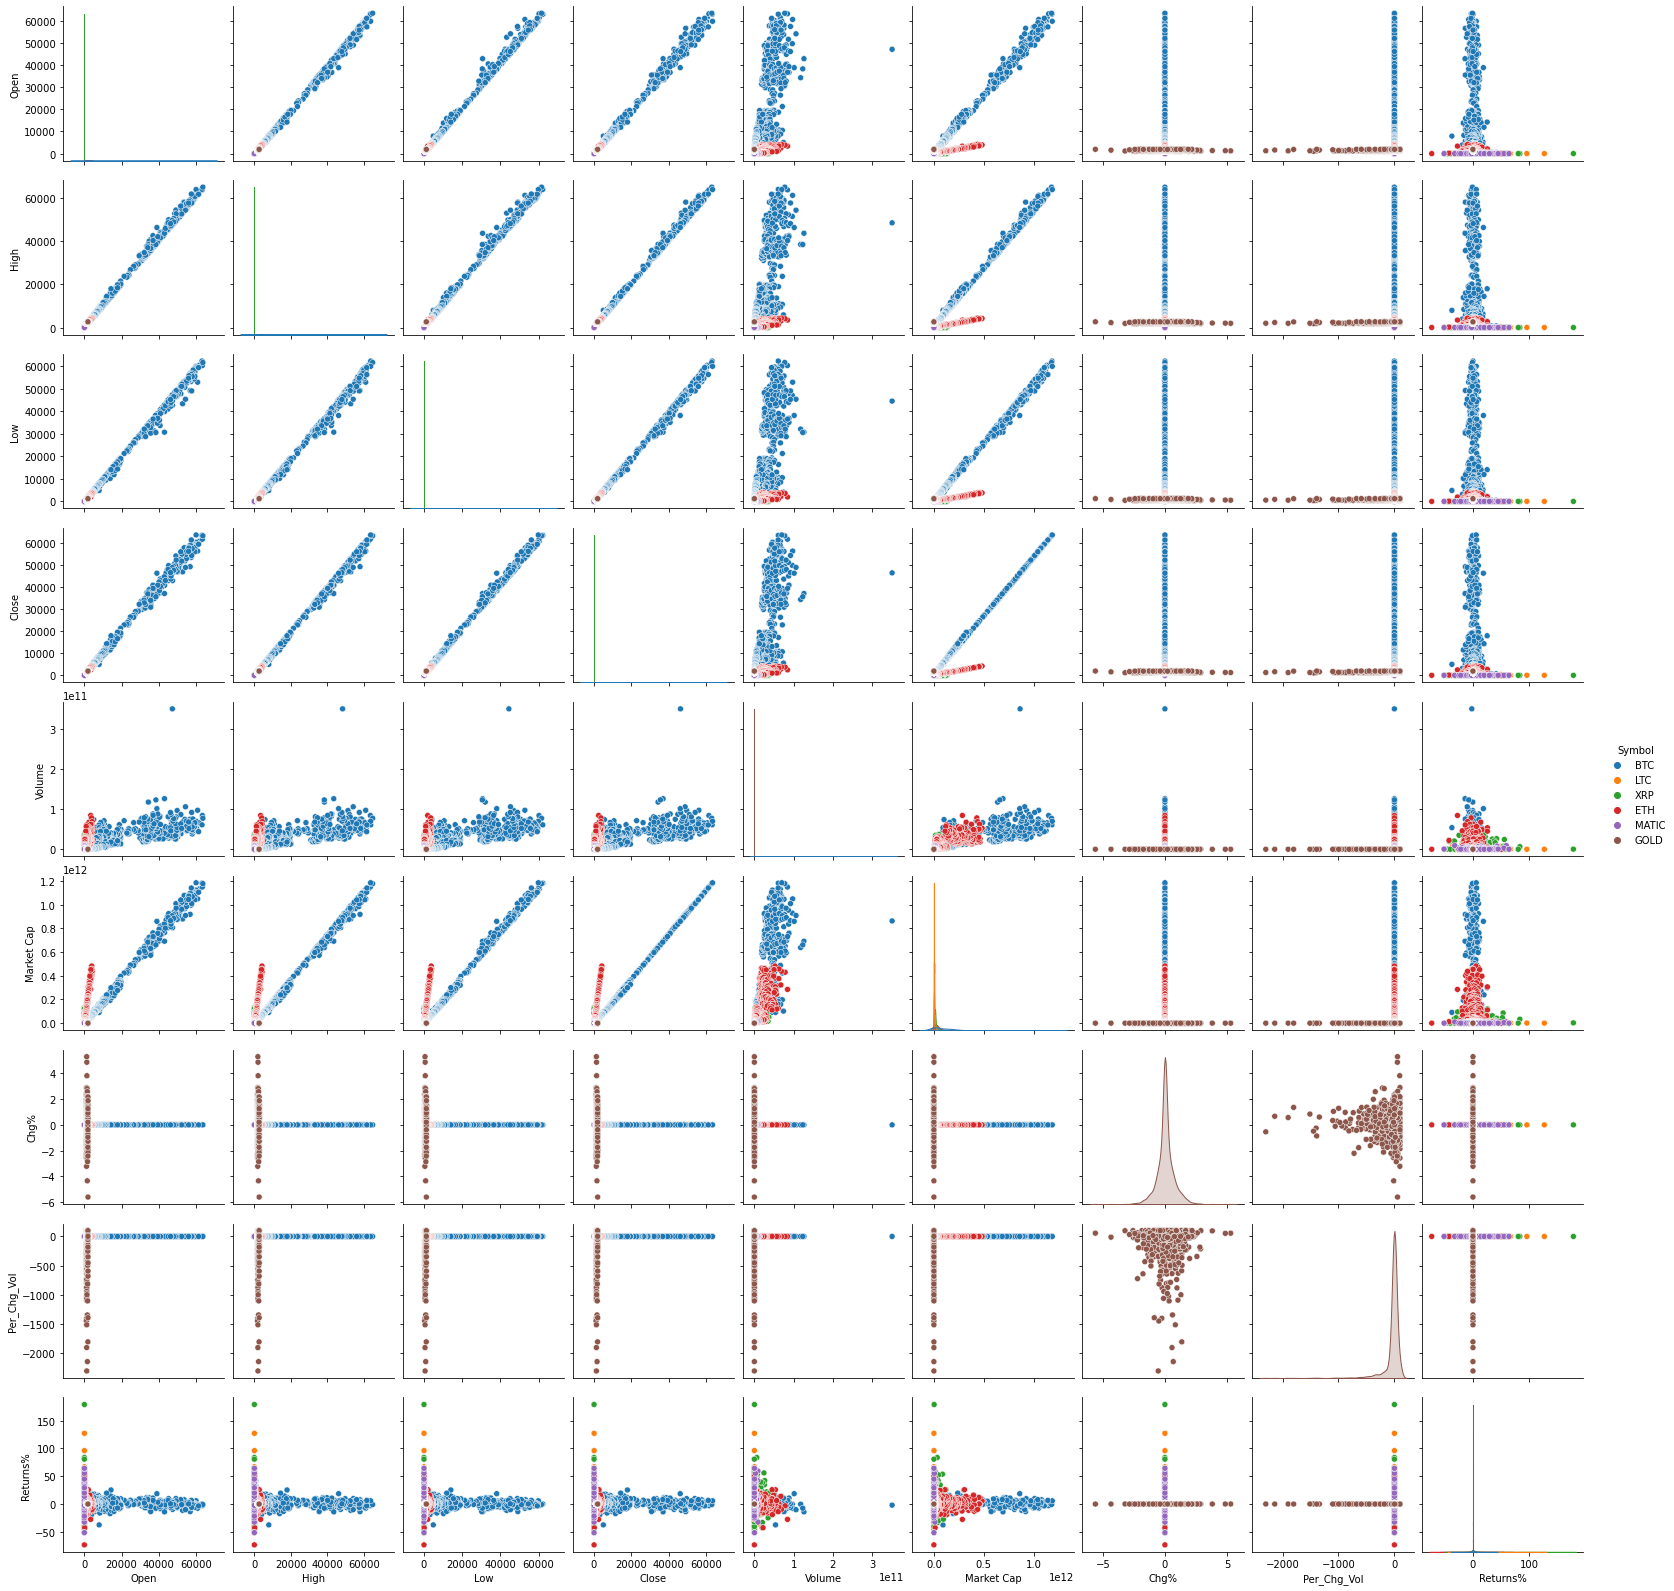

In [11]:
pair = sns.pairplot(df,hue='Symbol')
import matplotlib.pyplot as plt
plt.show()

<h3>3)Barplots

In [12]:
#Bar Plots for each attributes against different currencies

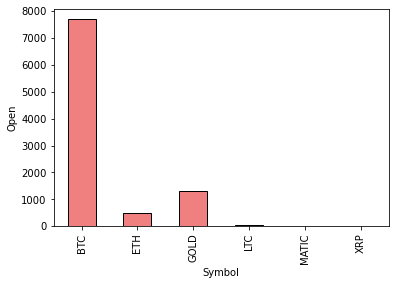

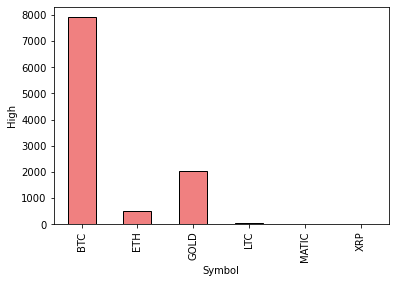

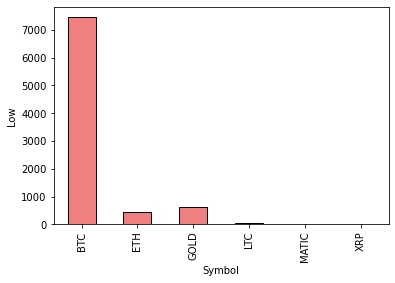

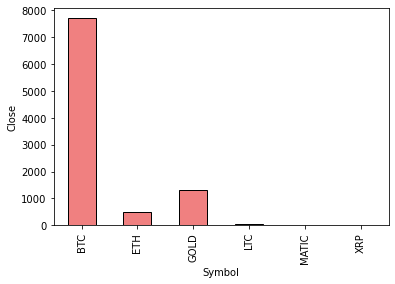

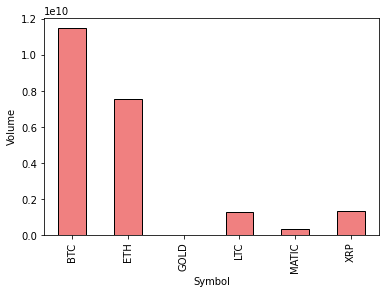

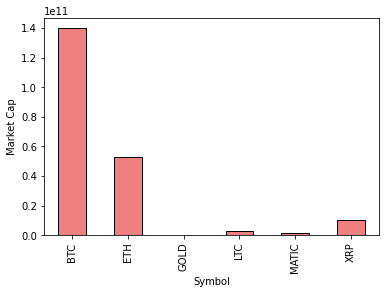

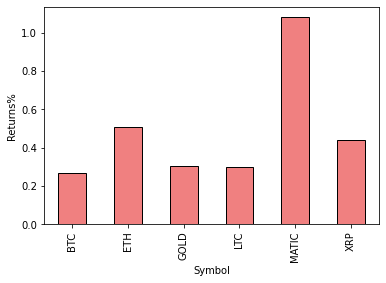

In [13]:
col=['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap','Returns%']
for i in col:
    dfg = df.groupby(['Symbol'])[i].mean()
    dfg.plot(kind='bar', ylabel=i, xlabel='Symbol',color='lightcoral',ec='black')
    plt.show()

In [14]:
# Functions for calculating Returns (weekly, montly, annually,etc)

def get_TimeFrame(data, timeframe):
    df_dict = {'Open':'first', 'High':'max', 'Low':'min', 'Close': 'last'}
    result = data.resample(timeframe, on='Date').apply(df_dict)
    result['Returns%'] = (result['Close'] - result['Open'])*100/result['Open'];
    return result

def get_rollingData(data, roll_weeks):
    rolling_data = get_TimeFrame(data, '1W')
    rolling_data = rolling_data['Returns%'].rolling(roll_weeks).sum()
    return rolling_data

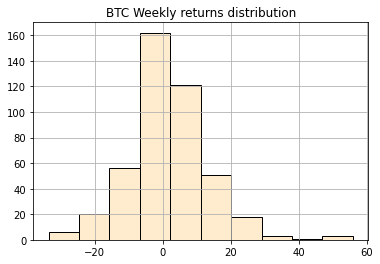

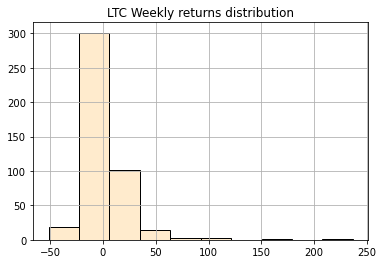

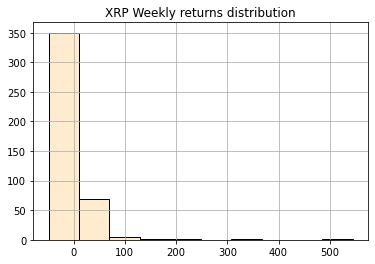

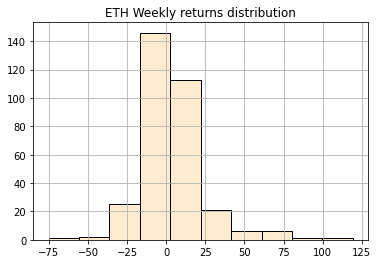

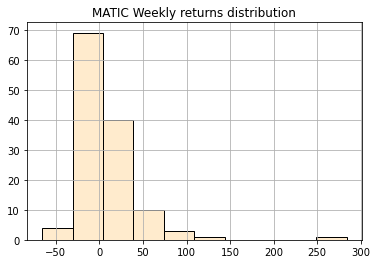

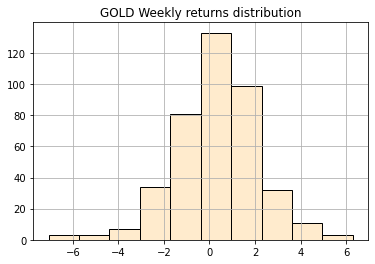

In [15]:
# Returns% 
#Visualizations for returns. This visualizations help to know which has given more return Gold or Crypto
investments=['BTC','LTC','XRP','ETH','MATIC','GOLD']

for i in investments:
    df_weekly=df.loc[df['Symbol'] == i]
    weekly = get_TimeFrame(df_weekly, '1W')
    ax =weekly['Returns%'].hist(color='blanchedalmond',ec='black')
    text=str(i)+''' Weekly returns distribution'''
    ax.title.set_text(text)
    plt.show()

<h3>4)Line Charts

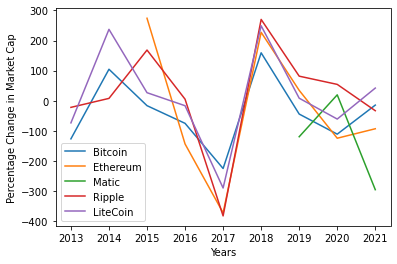

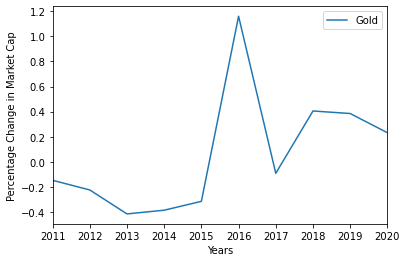

In [16]:
# Calculations for Market Cap Charts


btc_df['Per_Chg_MarCap'] = btc_df.groupby(btc_df.Date.dt.year)['Market Cap'].apply(pd.Series.pct_change)
eth_df['Per_Chg_MarCap'] = eth_df.groupby(eth_df.Date.dt.year)['Market Cap'].apply(pd.Series.pct_change)
ltc_df['Per_Chg_MarCap'] = ltc_df.groupby(ltc_df.Date.dt.year)['Market Cap'].apply(pd.Series.pct_change)
xrp_df['Per_Chg_MarCap'] = xrp_df.groupby(xrp_df.Date.dt.year)['Market Cap'].apply(pd.Series.pct_change)
matic_df['Per_Chg_MarCap'] = matic_df.groupby(matic_df.Date.dt.year)['Market Cap'].apply(pd.Series.pct_change)
#gold_data['Per_Chg_MarCap'] = gold_data.groupby(gold_data.Date.dt.year)['Market Cap'].apply(pd.Series.pct_change)

# groupby year and aggregate sum of pct_ch to get the yearly return
Per_Chg_MarCap_btc = btc_df.groupby(btc_df.Date.dt.year)['Per_Chg_MarCap'].sum().mul(100).reset_index().rename(columns={'Per_Chg_MarCap': 'cum_pct_ch_year'})
Per_Chg_MarCap_eth = eth_df.groupby(eth_df.Date.dt.year)['Per_Chg_MarCap'].sum().mul(100).reset_index().rename(columns={'Per_Chg_MarCap': 'cum_pct_ch_year'})
Per_Chg_MarCap_ltc = ltc_df.groupby(ltc_df.Date.dt.year)['Per_Chg_MarCap'].sum().mul(100).reset_index().rename(columns={'Per_Chg_MarCap': 'cum_pct_ch_year'})
Per_Chg_MarCap_xrp = xrp_df.groupby(xrp_df.Date.dt.year)['Per_Chg_MarCap'].sum().mul(100).reset_index().rename(columns={'Per_Chg_MarCap': 'cum_pct_ch_year'})
Per_Chg_MarCap_matic = matic_df.groupby(matic_df.Date.dt.year)['Per_Chg_MarCap'].sum().mul(100).reset_index().rename(columns={'Per_Chg_MarCap': 'cum_pct_ch_year'})
#Per_Chg_MarCap_gold = gold_data.groupby(gold_data.Date.dt.year)['Per_Chg_MarCap'].sum().mul(100).reset_index().rename(columns={'Per_Chg_MarCap': 'cum_pct_ch_year'})

import matplotlib.pyplot as plt
#plt.plot(Per_Chg_MarCap_gold.Date,Per_Chg_MarCap_gold.cum_pct_ch_year)
plt.plot(Per_Chg_MarCap_btc.Date,Per_Chg_MarCap_btc.cum_pct_ch_year,label='Bitcoin')
plt.plot(Per_Chg_MarCap_eth.Date,Per_Chg_MarCap_eth.cum_pct_ch_year,label='Ethereum')
plt.plot(Per_Chg_MarCap_matic.Date,Per_Chg_MarCap_matic.cum_pct_ch_year,label='Matic')
plt.plot(Per_Chg_MarCap_xrp.Date,Per_Chg_MarCap_xrp.cum_pct_ch_year,label='Ripple')
plt.plot(Per_Chg_MarCap_ltc.Date,Per_Chg_MarCap_ltc.cum_pct_ch_year,label='LiteCoin')
plt.ylabel("Percentage Change in Market Cap")
plt.xlabel("Years")
plt.legend()
plt.show()
plt.plot(gold_m.Date,gold_m.Change,label='Gold')
plt.ticklabel_format(style='plain')
plt.xlim(2011,2020)
plt.ylabel("Percentage Change in Market Cap")
plt.xlabel("Years")
plt.legend()
plt.show()

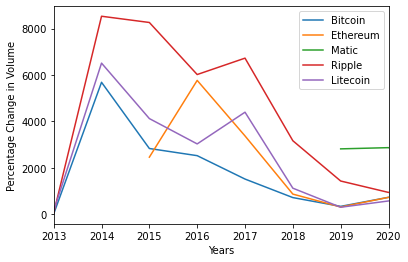

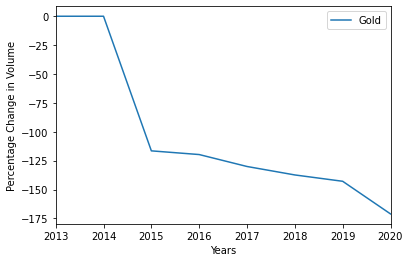

In [17]:
# Calculations for Volume Charts


gold_data['Date'] = pd.to_datetime(gold_data['Date'], errors='coerce')

btc_df['Per_Chg_Vol'] = btc_df.groupby(btc_df.Date.dt.year)['Volume'].apply(pd.Series.pct_change)
eth_df['Per_Chg_Vol'] = eth_df.groupby(eth_df.Date.dt.year)['Volume'].apply(pd.Series.pct_change)
ltc_df['Per_Chg_Vol'] = ltc_df.groupby(ltc_df.Date.dt.year)['Volume'].apply(pd.Series.pct_change)
xrp_df['Per_Chg_Vol'] = xrp_df.groupby(xrp_df.Date.dt.year)['Volume'].apply(pd.Series.pct_change)
matic_df['Per_Chg_Vol'] = matic_df.groupby(matic_df.Date.dt.year)['Volume'].apply(pd.Series.pct_change)
#gold_data['Per_Chg_Vol'] = gold_data.groupby(gold_data.Date.dt.year)['Volume'].apply(pd.Series.pct_change)

# groupby year and aggregate sum of pct_ch to get the yearly return
Per_Chg_Vol_btc = btc_df.groupby(btc_df.Date.dt.year)['Per_Chg_Vol'].sum().mul(100).reset_index().rename(columns={'Per_Chg_Vol': 'cum_pct_ch_year'})
Per_Chg_Vol_eth = eth_df.groupby(eth_df.Date.dt.year)['Per_Chg_Vol'].sum().mul(100).reset_index().rename(columns={'Per_Chg_Vol': 'cum_pct_ch_year'})
Per_Chg_Vol_ltc = ltc_df.groupby(ltc_df.Date.dt.year)['Per_Chg_Vol'].sum().mul(100).reset_index().rename(columns={'Per_Chg_Vol': 'cum_pct_ch_year'})
Per_Chg_Vol_xrp = xrp_df.groupby(xrp_df.Date.dt.year)['Per_Chg_Vol'].sum().mul(100).reset_index().rename(columns={'Per_Chg_Vol': 'cum_pct_ch_year'})
Per_Chg_Vol_matic = matic_df.groupby(matic_df.Date.dt.year)['Per_Chg_Vol'].sum().mul(100).reset_index().rename(columns={'Per_Chg_Vol': 'cum_pct_ch_year'})
#Per_Chg_Vol_gold = gold_data.groupby(gold_data.Date.dt.year)['Per_Chg_Vol'].sum().mul(100).reset_index().rename(columns={'Per_Chg_Vol': 'cum_pct_ch_year'})
Per_Chg_Vol_gold = gold_data.groupby(gold_data.Date.dt.year)['Per_Chg_Vol'].sum().div(100).reset_index().rename(columns={'Per_Chg_Vol': 'cum_pct_ch_year'})
import matplotlib.pyplot as plt

plt.plot(Per_Chg_Vol_btc.Date,Per_Chg_Vol_btc.cum_pct_ch_year,label='Bitcoin')
plt.plot(Per_Chg_Vol_eth.Date,Per_Chg_Vol_eth.cum_pct_ch_year,label='Ethereum')
plt.plot(Per_Chg_Vol_matic.Date,Per_Chg_Vol_matic.cum_pct_ch_year,label='Matic')
plt.plot(Per_Chg_Vol_xrp.Date,Per_Chg_Vol_xrp.cum_pct_ch_year,label='Ripple')
plt.plot(Per_Chg_Vol_ltc.Date,Per_Chg_Vol_ltc.cum_pct_ch_year,label='Litecoin')
plt.xlim(2013,2020)
plt.ylabel("Percentage Change in Volume")
plt.xlabel("Years")
plt.legend()
plt.show()
plt.plot(Per_Chg_Vol_gold.Date,Per_Chg_Vol_gold.cum_pct_ch_year,label='Gold')

plt.xlim(2013,2020)
plt.ylabel("Percentage Change in Volume")
plt.xlabel("Years")
plt.legend()
plt.show()

<h3>Model Training

In [18]:
#Model Training
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error


In [19]:
def model_test(df):    
    col_name=['Open','High','Low','Per_Chg_Vol','Volume']
    
    #Training and splitting dataset
    X_train, X_test, Y_train, Y_test = train_test_split(df[col_name], df['Close'], test_size=0.25)
    
    linear_reg = LinearRegression()
    
    #Training Dataset
    linear_reg.fit(X_train, Y_train)
    
    #Testing X_test
    Y_pred = linear_reg.predict(X_test)
    
    #Calculating Accuracy
    r2 = r2_score(Y_test, Y_pred)
    print('R2 score of Model is:',r2)
    
    return 
    
    

In [20]:
#print('R2 score of Model is:',model_test(df))
model_test(df)

R2 score of Model is: 0.9995570407694047


In [ ]:
# for this hypothesis models are not required.